# Attribute information
* Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
* Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
* Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
* Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
* Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
* Age -- quantitative -- Day (1~365) -- Input Variable
* Concrete compressive strength -- quantitative -- MPa(megapascals) -- Output Variable

In [30]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

from sklearn.linear_model import LinearRegression
%matplotlib inline 
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function


# Data - first few rows

In [32]:
data = pd.read_csv("C:\\Users\\Seeni\\PG-AIML\\Inputs\\Concrete_Data.csv")
data_dup=data.copy() # we have a copy if needed with original data set
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [35]:
#renaming columns - shortern for easy handling
data = data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"Cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"Furnace_slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)':"Fly_ash",
       'Water  (component 4)(kg in a m^3 mixture)':"Water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)':"Super_plasticizer",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"Coarse_agg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"Fine_agg", 'Age (day)':"Age",
       'Concrete compressive strength(MPa, megapascals) ':"Compressive_strength"})

data.head() # print reformatted data for review

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Data Information

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cement                1030 non-null   float64
 1   furnace_slag          1030 non-null   float64
 2   fly_ash               1030 non-null   float64
 3   water                 1030 non-null   float64
 4   super_plasticizer     1030 non-null   float64
 5   coarse_agg            1030 non-null   float64
 6   fine_agg              1030 non-null   float64
 7   age                   1030 non-null   int64  
 8   compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Missing values

In [37]:
print (data.isnull().sum())

cement                  0
furnace_slag            0
fly_ash                 0
water                   0
super_plasticizer       0
coarse_agg              0
fine_agg                0
age                     0
compressive_strength    0
dtype: int64


# Data dimensions

In [38]:
print("Number of rows    :",data.shape[0])
print("Number of columns :",data.shape[1])

Number of rows    : 1030
Number of columns : 9


In [40]:
# Central values (mean and median), standard deviation and quartiles
data.describe().T #

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
furnace_slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
super_plasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_agg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_agg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
compressive_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [41]:
data.skew() # Check the data whether the data is skewed and either postive or negative.

cement                  0.509481
furnace_slag            0.800717
fly_ash                 0.537354
water                   0.074628
super_plasticizer       0.907203
coarse_agg             -0.040220
fine_agg               -0.253010
age                     3.269177
compressive_strength    0.416977
dtype: float64

In [43]:
data.isnull().sum() # make sure no null values

cement                  0
furnace_slag            0
fly_ash                 0
water                   0
super_plasticizer       0
coarse_agg              0
fine_agg                0
age                     0
compressive_strength    0
dtype: int64

# Surface plot for variables
* X - Axis = columns encoded all the values
* Y - Axis = index.
* Z - Axis = values .

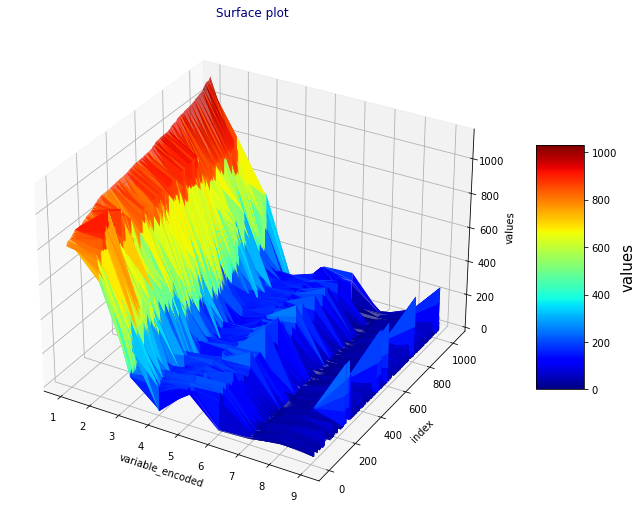

In [44]:
from mpl_toolkits.mplot3d import Axes3D
data1 = data.copy()

data1 = data1.sort_values(by=['coarse_agg'],ascending=True).reset_index()

data1 = data1[['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
               'coarse_agg', 'fine_agg', 'age', 'compressive_strength']] 

df = data1.unstack().reset_index()
df.columns = ["X","Y","Z"]


df["X"] = df["X"].map({'coarse_agg':1, 'fine_agg':2 , 
                       'cement':3, 'furnace_slag':6, 'fly_ash':4,
                       'water':5, 'super_plasticizer':7,
                        'age':9, 'compressive_strength':8})
 
fig = plt.figure(figsize=(14,9))

ax  = fig.gca(projection = "3d")

surf = ax.plot_trisurf(df["X"],df["Y"],df["Z"],cmap="jet",linewidth=2)
lab  = fig.colorbar(surf,shrink=.5,aspect=5)
lab.set_label("values",fontsize=15)

ax.set_xlabel("variable_encoded")
ax.set_ylabel("index")
ax.set_zlabel("values")

plt.title("Surface plot",color="navy")
plt.show()

# Variables summary - with heatmap

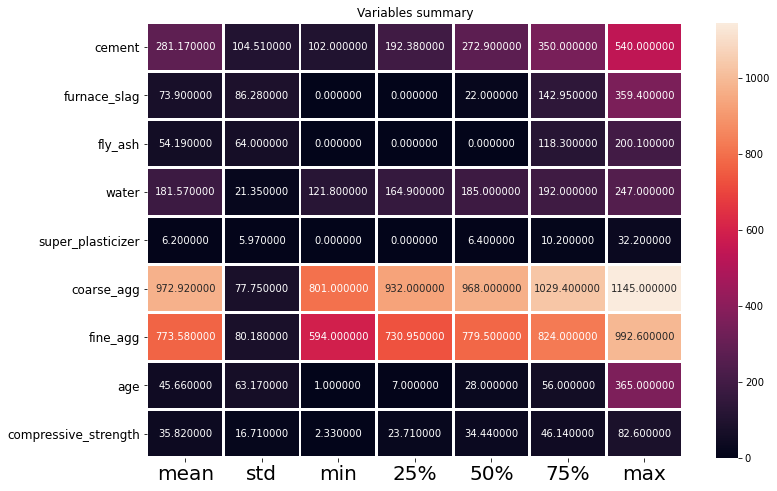

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

# Ingredients Distribution

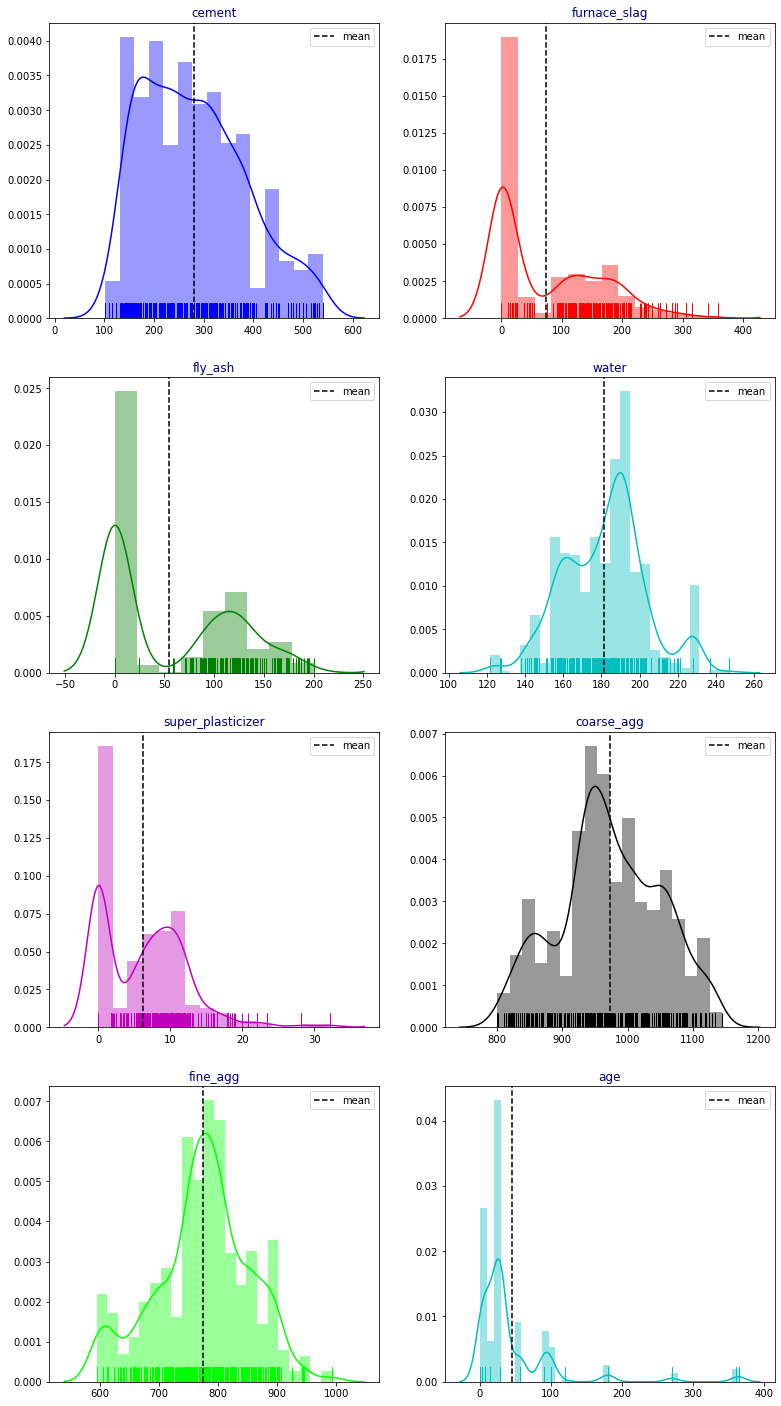

In [45]:
cols = [i for i in data.columns if i not in 'compressive_strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(data[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

# Compressive strength distribution

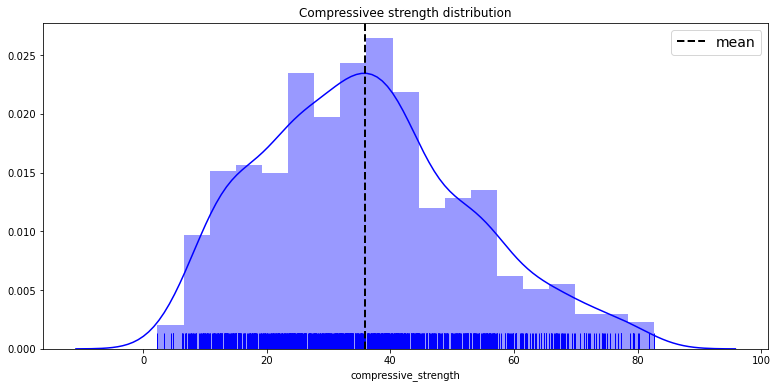

In [46]:
plt.figure(figsize=(13,6))
sns.distplot(data["compressive_strength"],color="b",rug=True)
plt.axvline(data["compressive_strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressivee strength distribution")
plt.show()

# Pair plot between variables

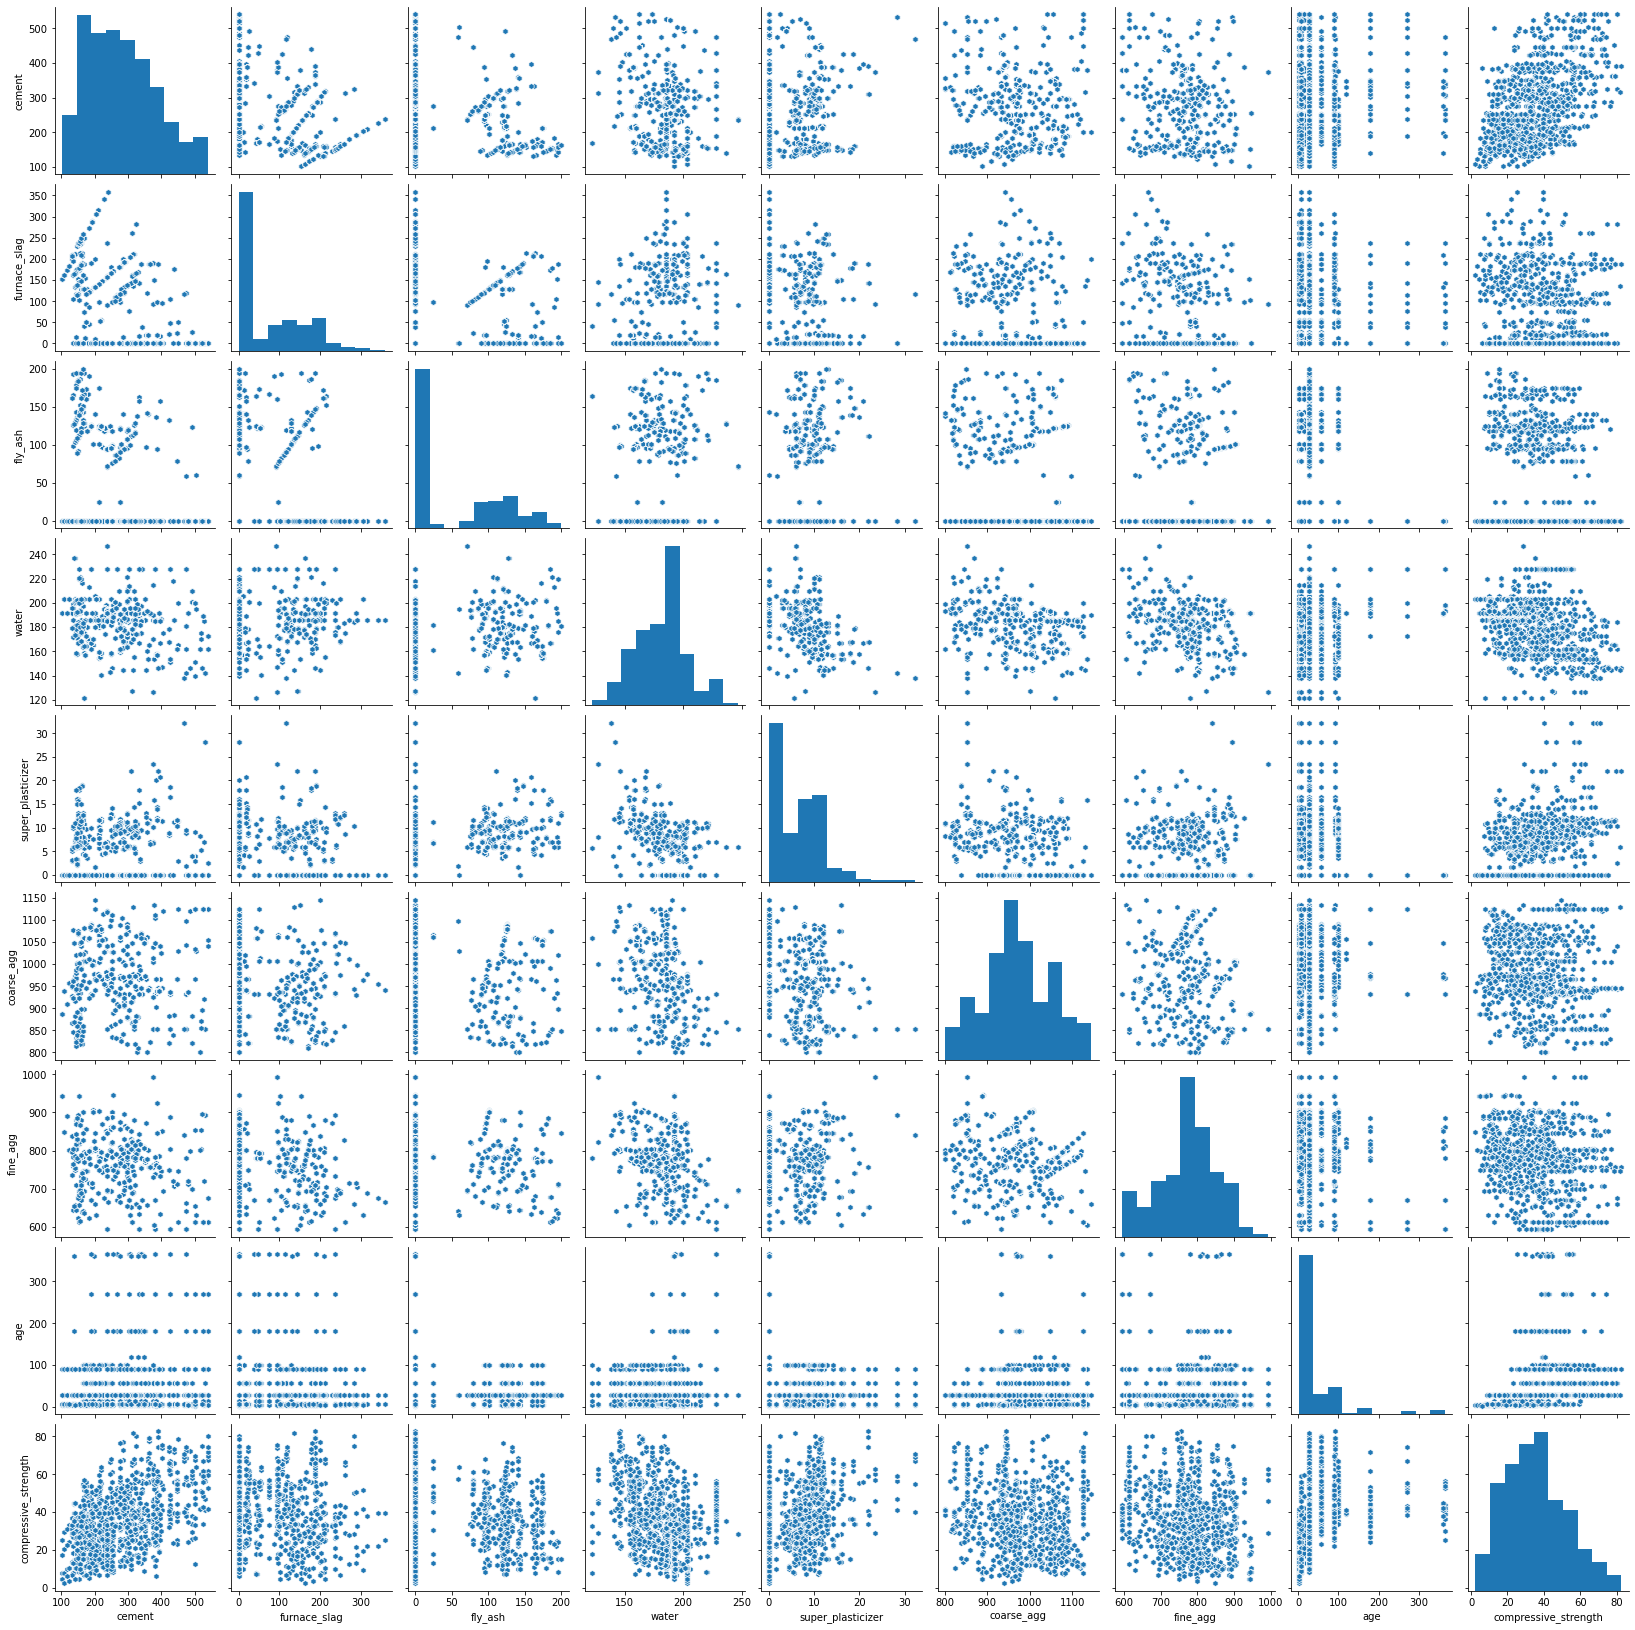

In [47]:
sns.pairplot(data,markers="h")
plt.show()

# parllell coordinates plot for 3 categories 
* Concrete's compressive strength requirements can vary from 2500 psi (17 MPa) for residential concrete to 4000psi (28 MPa) and higher in commercial structures. Higher strengths upto and exceeding 10,000 psi (70 MPa) are specified for certain applications.
* Binning compressive strength in 3 categories.
* category 1 - mpa  less than 17.
* category 2 - mpa in between 17 to 28.
* category 3 - mpa greater than 28.

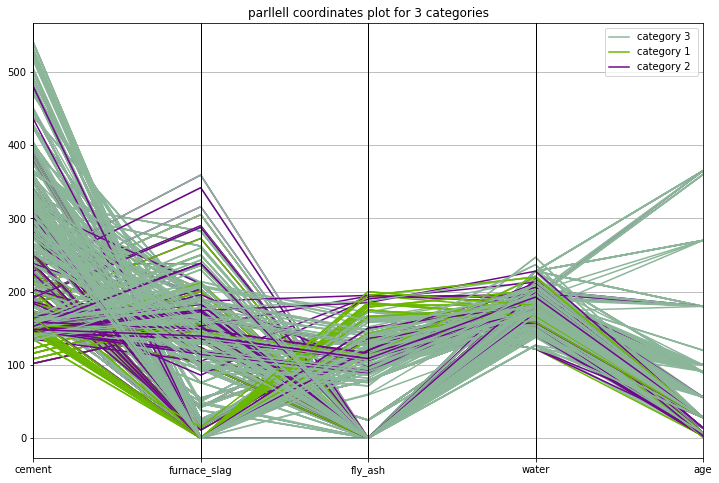

In [53]:
data2  =  data.copy()

def lab(data2):
    if data2["compressive_strength"] <= 17:
        return "category 1"
    if data2["compressive_strength"] >17 and data2["compressive_strength"] <= 28 :
        return "category 2"
    if data2["compressive_strength"] >28 :
        return "category 3 "
    
data2["compressive_strength_category"] = data2.apply(lambda data2:lab(data2) ,axis =1)

from pandas.plotting import parallel_coordinates

cols1 = ['cement', 'furnace_slag','fly_ash', 'water',"compressive_strength_category",'age']

plt.figure(figsize=(12,8))
parallel_coordinates(data2[cols1],"compressive_strength_category")
plt.title("parllell coordinates plot for 3 categories")
plt.show()

# scatter plot between cement and water
* X - axis = water.
* Y - axis = cement.
* SIZE and COLOR = compressive strength.

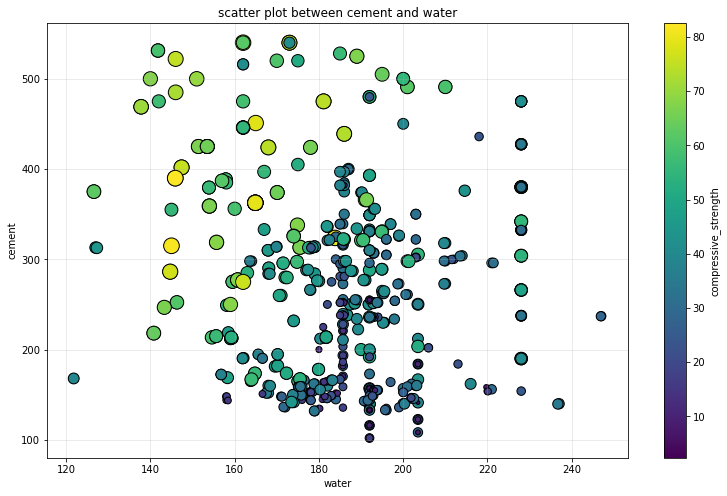

In [54]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(data["water"],data["cement"],
            c=data["compressive_strength"],s=data["compressive_strength"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("water")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between cement and water")
plt.grid(True,alpha=.3)
plt.show()

# Feature Engineering techniques


### Splitting train and test data

In [51]:
#Splitting train and test data
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size =.3,random_state = 123)
train_X = train[[x for x in train.columns if x not in ["compressive_strength"] + ["age_months"]]]
train_Y = train["compressive_strength"]
test_X  = test[[x for x in test.columns if x not in ["compressive_strength"] + ["age_months"]]]
test_Y  = test["compressive_strength"]


# Model

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

target = "compressive_strength"
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type):
    
    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)
    prediction = algorithm.predict(dtestx)
    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(dtesty,prediction)) )
    print ("***************************************************************************")
    prediction = pd.DataFrame(prediction)
    cross_val = cross_val_score(algorithm,dtrainx,dtrainy,cv=20,scoring="neg_mean_squared_error")
    cross_val = cross_val.ravel()
    print ("CROSS VALIDATION SCORE")
    print ("************************")
    print ("cv-mean :",cross_val.mean())
    print ("cv-std  :",cross_val.std())
    print ("cv-max  :",cross_val.max())
    print ("cv-min  :",cross_val.min())
    
    plt.figure(figsize=(13,28))
    plt.subplot(211)
    
    testy = dtesty.reset_index()["compressive_strength"]
    
    ax = testy.plot(label="originals",figsize=(12,13),linewidth=2)
    ax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)
  #  plt.axhline(testy.mean(),color = "r",linestyle="dashed",label=("original_mean:",testy.mean()))
  #  plt.axhline(prediction[0].mean(),color="b",linestyle = "dashed",label=("prediction_mean:",prediction[0].mean()))
    plt.legend(loc="best")
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    ax.set_facecolor("k")
    
    plt.subplot(212)
    
    if of_type == "coef":
        coef = pd.DataFrame(algorithm.coef_.ravel())
        coef["feat"] = dtrainx.columns
        ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax1.set_facecolor("lightgrey")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')
    
    elif of_type == "feat":
        coef = pd.DataFrame(algorithm.feature_importances_)
        coef["feat"] = dtrainx.columns
        ax2 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')

import warnings
warnings.filterwarnings("ignore")


# Linear Regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.259026562177118
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -113.26476202982504
cv-std  : 21.485876840663625
cv-max  : -67.52295962102654
cv-min  : -166.6939304200029


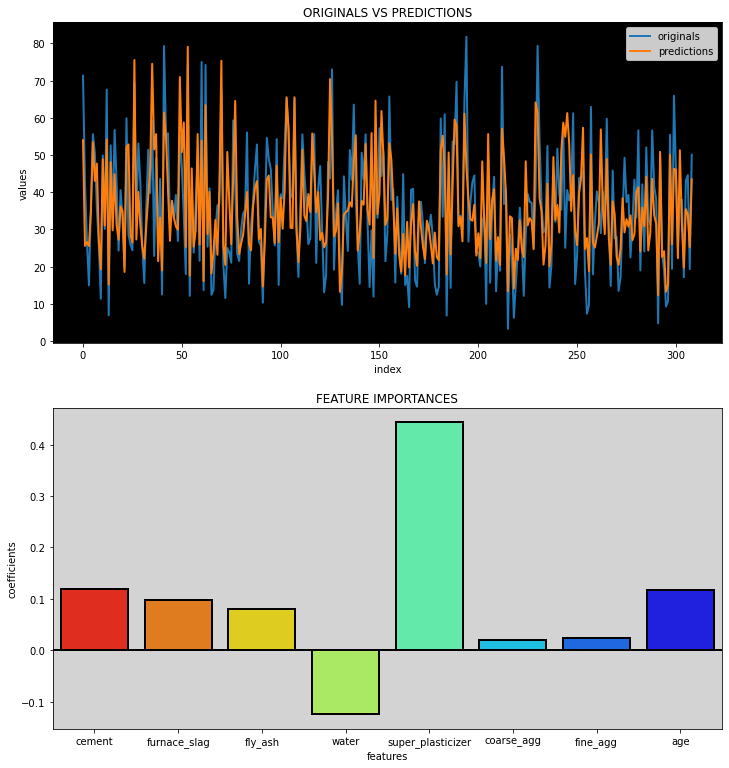

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,train_X,train_Y,test_X,test_Y,"coef")

# Lasso Regression

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.222289461079956
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -113.33064732894589
cv-std  : 21.135184436354397
cv-max  : -67.93694309398684
cv-min  : -164.922802427878


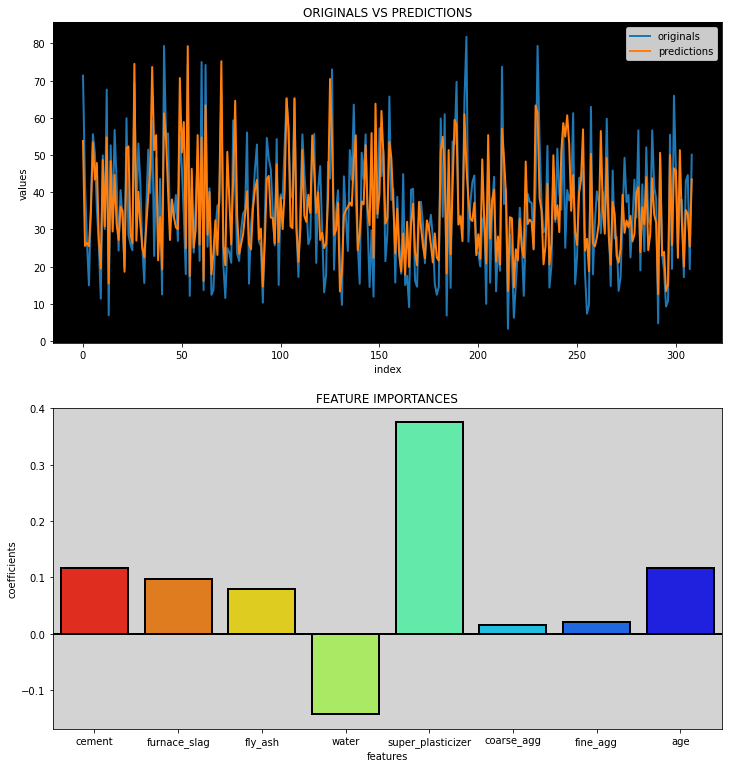

In [58]:
from sklearn.linear_model import Ridge,Lasso
ls = Lasso()
model(ls,train_X,train_Y,test_X,test_Y,"coef")

# Ridge Regression

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.25899822023129
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -113.2646823094826
cv-std  : 21.485650854321662
cv-max  : -67.52314595848337
cv-min  : -166.69259552822308


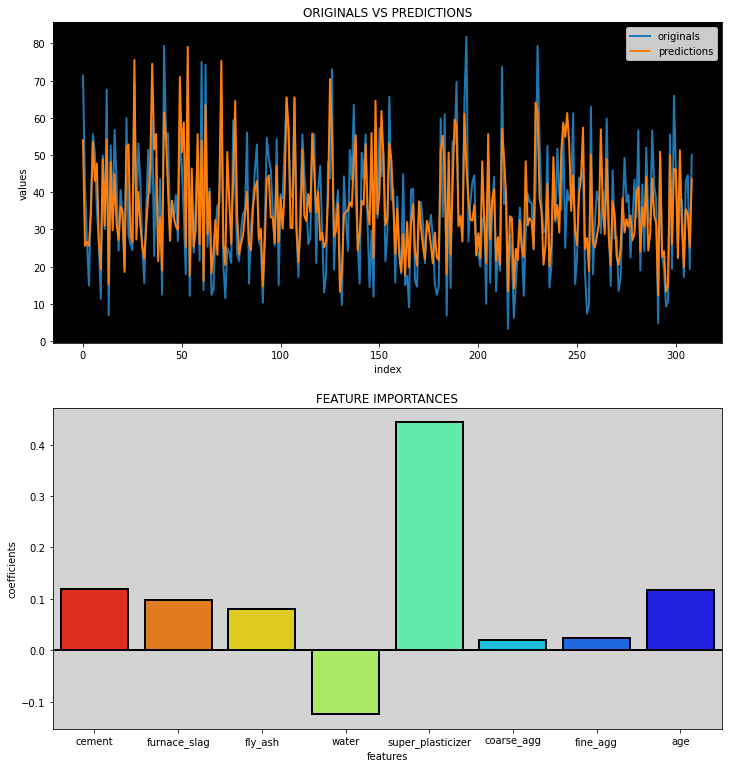

In [59]:
rigde = Ridge()
model(rigde,train_X,train_Y,test_X,test_Y,"coef")

# ExtraTrees Regressor

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 4.884968001765805
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -22.56291629706817
cv-std  : 7.663976236735691
cv-max  : -8.9369754540972
cv-min  : -38.55088092694444


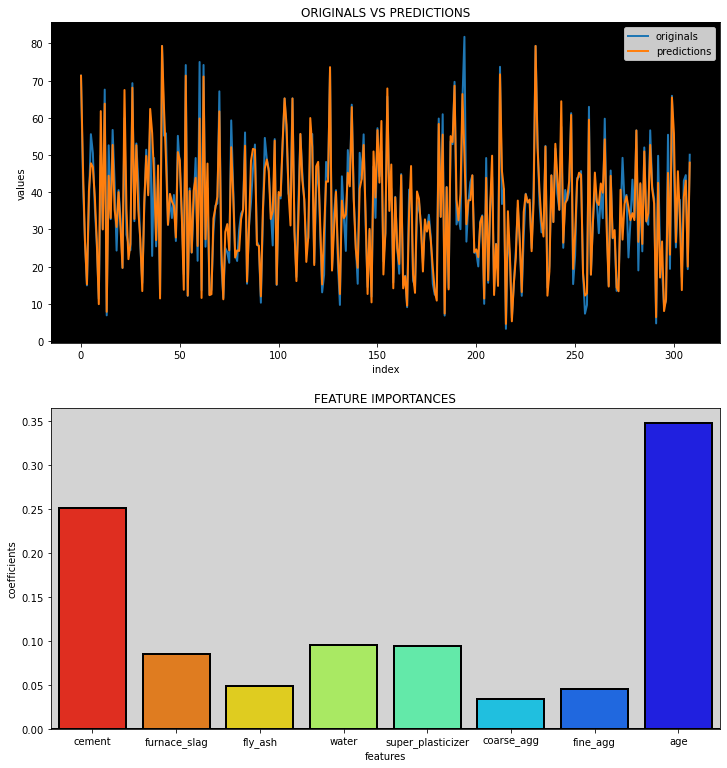

In [66]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
model(etr,train_X,train_Y,test_X,test_Y,"feat")

# Random Forest Regressor

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.164832134478561
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -26.20415055976789
cv-std  : 10.042946445492527
cv-max  : -10.566760618094483
cv-min  : -45.42754866737652


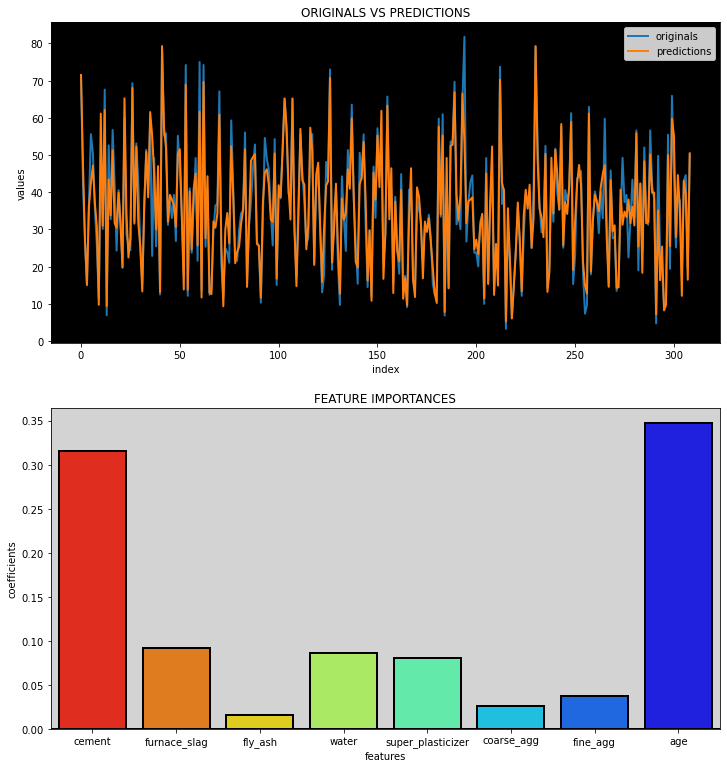

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model(rf,train_X,train_Y,test_X,test_Y,"feat")

# Gradient Boosting Regressor

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 4.95933441174445
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -26.572992580384852
cv-std  : 7.575864635128762
cv-max  : -18.080854639303126
cv-

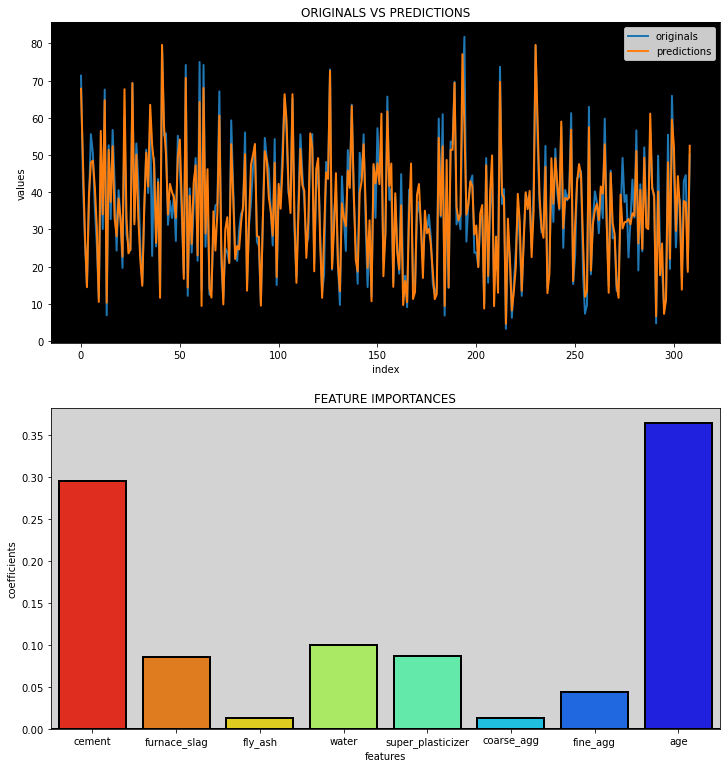

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
model(gbr,train_X,train_Y,test_X,test_Y,"feat")